In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/kaggle/input/renewable-energy-and-weather-conditions/solar_weather.csv')
data.sample(20)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
176775,2022-02-02 09:45:00,277,10.8,3.8,1000,94,6.4,0.51,0.0,84,1,195,540,0.36,5,9,2
114718,2020-04-15 23:30:00,0,0.0,8.1,1016,68,5.6,0.00,0.0,79,0,0,840,0.00,3,23,4
101420,2019-11-29 11:00:00,300,15.6,4.3,996,78,8.3,0.11,0.0,47,1,270,480,0.56,5,11,11
194270,2022-08-05 15:30:00,531,80.4,25.3,1013,83,1.3,0.49,0.0,83,1,750,930,0.81,5,15,8
161909,2021-08-20 13:15:00,1020,50.9,15.8,1015,86,1.0,0.93,0.0,92,1,585,870,0.67,5,13,8
84597,2019-06-06 05:15:00,407,77.7,21.0,1009,71,4.8,0.00,0.0,16,1,180,1005,0.18,2,5,6
102370,2019-12-09 08:30:00,702,11.3,5.6,997,85,6.1,0.00,0.0,8,1,105,465,0.23,1,8,12
22081,2017-08-24 00:15:00,0,0.0,8.5,1017,100,1.4,0.00,0.0,95,0,0,855,0.00,4,0,8
107586,2020-02-01 16:30:00,0,0.0,10.0,997,95,5.0,0.43,0.0,100,0,0,540,0.00,5,16,2
100403,2019-11-18 20:45:00,0,0.0,7.9,1010,91,5.4,0.00,0.0,93,0,0,510,0.00,4,20,11


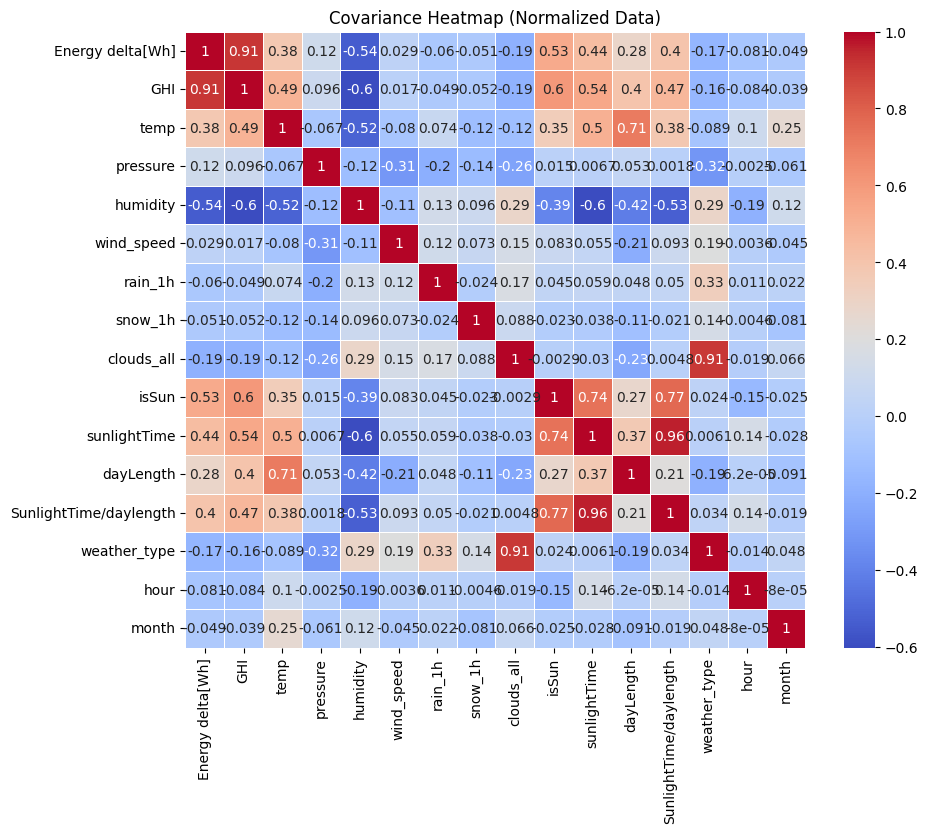

In [15]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(heatmap_data)
normalized_df = pd.DataFrame(normalized_data, columns=heatmap_data.columns)
covariance_matrix = normalized_df.cov()

plt.figure(figsize=(10, 8)) 
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Heatmap (Normalized Data)')
plt.show()

columns 
1. pressure (-0.32)
2. humidity (0.29)
3. wind_speed (0.19)
4. rain_1h (0.33)
5. snow_1h (0.14)
6. clouds_all (0.96)
7. day_length (0.21)

In [44]:
# Since there are a lot of features let us first take clouds_all as hidden state (since it has the highest covariance)
# Also before that we need to first quantize the clouds_all else there will be 100 unique values
trimmed_data = data.iloc[::1]
trimmed_data = trimmed_data[['Time','clouds_all', 'weather_type']]
bins = [0,10,20,30,40,50,60,70,80,90,100] 
labels = [0,1,2,3,4,5,6,7,8,9]  
trimmed_data['cloud_category'] = pd.cut(trimmed_data['clouds_all'], bins=bins, labels=labels, include_lowest=True)
trimmed_data

,Time,clouds_all,weather_type,cloud_category
0,2017-01-01 00:00:00,100,4,9
1,2017-01-01 00:15:00,100,4,9
2,2017-01-01 00:30:00,100,4,9
3,2017-01-01 00:45:00,100,4,9
4,2017-01-01 01:00:00,100,4,9
...,...,...,...,...
196771,2022-08-31 16:45:00,52,3,5
196772,2022-08-31 17:00:00,60,3,5
196773,2022-08-31 17:15:00,60,3,5
196774,2022-08-31 17:30:00,60,3,5


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weather_type', ylabel='Count'>

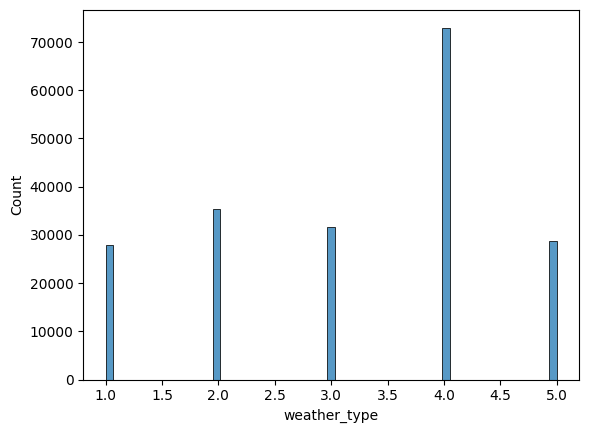

In [25]:
import seaborn as sns
sns.histplot(data['weather_type'])

In [51]:
# Calculating the Transition Matrix
transition_matrix = np.zeros((10,10))
states = trimmed_data['cloud_category'].unique()
state_to_idx = {state: idx for idx, state in enumerate(states)}
for i in range(len(data) - 1):
    current_state = trimmed_data['cloud_category'].iloc[i]
    next_state = trimmed_data['cloud_category'].iloc[i + 1]
    transition_matrix[state_to_idx[current_state], state_to_idx[next_state]] += 1
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
print(transition_matrix)

[[9.69469644e-01 6.38520586e-03 1.29099791e-03 3.72179577e-04
  1.74459177e-04 1.97720400e-04 5.69899977e-04 2.05861828e-03
  3.54733659e-03 1.59339381e-02]
 [5.11551155e-02 7.97946461e-01 1.54015402e-02 5.50055006e-03
  2.20022002e-03 3.11697836e-03 9.44261093e-03 2.55775578e-02
  3.78621195e-02 5.17968464e-02]
 [1.30176302e-02 1.85526855e-02 8.03608036e-01 2.33702337e-02
  7.68757688e-03 1.33251333e-02 4.49979500e-02 3.64903649e-02
  2.62402624e-02 1.27101271e-02]
 [2.75694751e-03 7.71945302e-03 2.72386414e-02 8.09770622e-01
  2.94441994e-02 4.62064402e-02 4.49933833e-02 1.53286281e-02
  1.14689016e-02 5.07278341e-03]
 [6.42398287e-04 7.49464668e-04 2.85510350e-03 9.85010707e-03
  9.54461099e-01 2.30906495e-02 5.10349750e-03 1.64168451e-03
  1.07066381e-03 5.35331906e-04]
 [1.98938992e-03 4.42086649e-03 1.19363395e-02 4.76348364e-02
  7.53757737e-02 8.19076039e-01 2.18832891e-02 8.62068966e-03
  5.96816976e-03 3.09460654e-03]
 [5.83616299e-03 1.19906621e-02 4.06409168e-02 4.76443124e

In [55]:
# Calculating the Emmision Matrix
emission_matrix = np.zeros((10,5)) # the shape of emmission matrix should be states*observation
states = trimmed_data['cloud_category'].unique()
observations = trimmed_data['weather_type'].unique()
state_to_idx = {state: idx for idx, state in enumerate(states)}
obs_to_idx = {obs: idx for idx, obs in enumerate(observations)}
for i in range(len(data)):
    state = trimmed_data['cloud_category'].iloc[i]
    obs = trimmed_data['weather_type'].iloc[i]
    emission_matrix[state_to_idx[state], obs_to_idx[obs]] += 1
emission_matrix = emission_matrix / emission_matrix.sum(axis=1, keepdims=True)
print(emission_matrix)

[[0.75054664 0.24945336 0.         0.         0.        ]
 [0.         0.11624496 0.88375504 0.         0.        ]
 [0.         0.09143091 0.         0.90856909 0.        ]
 [0.         0.02690781 0.         0.97309219 0.        ]
 [0.         0.00157031 0.         0.         0.99842969]
 [0.         0.00928382 0.         0.99071618 0.        ]
 [0.         0.06876061 0.         0.93123939 0.        ]
 [0.         0.10437294 0.89562706 0.         0.        ]
 [0.         0.12102161 0.87897839 0.         0.        ]
 [0.5764834  0.12493195 0.29858465 0.         0.        ]]


In [58]:
# Initialize the initial matrix (π)
initial_matrix = np.zeros(len(observations))  # Length based on number of observations (weather types)
obs_to_idx = {obs: idx for idx, obs in enumerate(observations)}
for i in range(len(trimmed_data)):
    obs = trimmed_data['weather_type'].iloc[i]
    initial_matrix[obs_to_idx[obs]] += 1
initial_matrix = initial_matrix / initial_matrix.sum()
print(initial_matrix)

[0.37100053 0.14589178 0.1608936  0.18004228 0.14217181]


In [61]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.0 MB/s eta 0:00:00a 0:00:01


In [66]:
import numpy as np
from hmmlearn import hmm

# Define number of states and observations
n_states = 10  # Number of cloud categories
n_observations = len(observations)  # Number of unique weather types

# Initialize the HMM model
model = hmm.MultinomialHMM(n_components=n_states)

# Set the parameters of the HMM model
model.transmat_ = transition_matrix
model.startprob_ = initial_matrix

# Prepare the observation sequence
observation_sequence = [obs_to_idx[obs] for obs in trimmed_data['weather_type']]
observation_sequence = np.array(observation_sequence).reshape(-1, 1)

# Train the model
model.fit(observation_sequence)


MultinomialHMM(n_components=10, n_trials=array([0, 0, 0, ..., 2, 2, 2]),
               random_state=RandomState(MT19937) at 0x7BF86EAD7240)

In [67]:
logprob, hidden_states = model.decode(observation_sequence, algorithm="viterbi")


In [69]:
print(hidden_states)

[8 5 3 ... 3 3 3]
